모든 변수에 대한 EDA 및 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config inlineBackend.figure_format = 'retina'

변수 종류

- Date : 대여 날짜(MM/DD/YY)
- Rented Bike Count : 시간대별 자전거 대여량 / `종속변수`
- Hour : 대여 시간(0시~23시)
- Temperature : 기온
- Humidity : 습도
- Wind speed : 풍속
- Visibility : 가시성
- Dew point temperature : 이슬점 온도(수증기의 응결이 시작되는 온도)
- Solar Radiation : 태양복사열
- Rainfall : 강수량
- Snowfall : 적설량
- Seasons : 계절
- Holiday : 공휴일 유무
- Functioning day : 운영일

In [2]:
data = pd.read_csv('../과제 데이터/train.csv', encoding='cp949')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


In [3]:
#칼럼명 수정하기
data.columns[3:]
for col in data.columns[3:]:
    data.rename(columns={col: col.split('(')[0].strip()}, inplace=True)

data

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


## Functioning Day(운영일)

In [5]:
data['Functioning Day'].value_counts()

Functioning Day
Yes    6772
No      236
Name: count, dtype: int64

In [6]:
# Yes와 No 구분해보기
data_func_y = data[data['Functioning Day'] == 'Yes']
data_func_y

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


In [7]:
data_func_y['Seasons'].value_counts()

Seasons
Summer    1598
Winter    1570
Spring    1516
Autumn    1414
Name: count, dtype: int64

In [8]:
data_func_n = data[data['Functioning Day'] == 'No']
data_func_n

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
16,02/10/2018,0,8,11.2,69,0.9,1714,5.7,0.49,0.0,0.0,Autumn,No Holiday,No
30,09/11/2018,0,23,10.9,76,1.2,456,6.8,0.00,0.0,0.0,NaN,No Holiday,No
168,28/09/2018,0,7,14.5,62,1.5,2000,7.2,0.03,0.0,0.0,NaN,No Holiday,No
170,06/11/2018,0,14,17.4,50,NaN,336,6.8,1.52,0.0,0.0,Autumn,No Holiday,No
229,09/11/2018,0,13,14.0,46,5.3,927,2.5,1.68,0.0,0.0,Autumn,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,06/10/2018,0,2,16.9,88,2.5,2000,14.8,0.00,1.5,0.0,Autumn,No Holiday,No
6883,19/09/2018,0,23,20.4,57,0.9,2000,11.5,0.00,0.0,0.0,Autumn,No Holiday,No
6927,18/09/2018,0,10,22.7,54,1.0,1619,12.9,1.74,0.0,0.0,Autumn,No Holiday,No
6931,28/09/2018,0,4,NaN,62,1.5,2000,7.4,0.00,0.0,0.0,Autumn,No Holiday,No


In [9]:
data_func_n['Seasons'].value_counts()

# Yes 와 No를 비교한 결과, Yes는 자전거 대여 서비스를 운영한 경우를 뜻하고, No는 운영하지 않은 것을 의미한다.

Seasons
Autumn    173
Spring     38
Name: count, dtype: int64

In [10]:
# Functioning day == No 인 행 제거하기
data2 = data[data['Functioning Day'] == 'Yes']
data3 = data2.reset_index(drop=True) #인덱스 재정렬
data3

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
6768,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
6769,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
6770,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


Rented Bike Count

In [12]:
data3['Rented Bike Count']

0       1492
1       1536
2        327
3        170
4         45
        ... 
6767     255
6768     104
6769     569
6770    2234
6771    1290
Name: Rented Bike Count, Length: 6772, dtype: int64

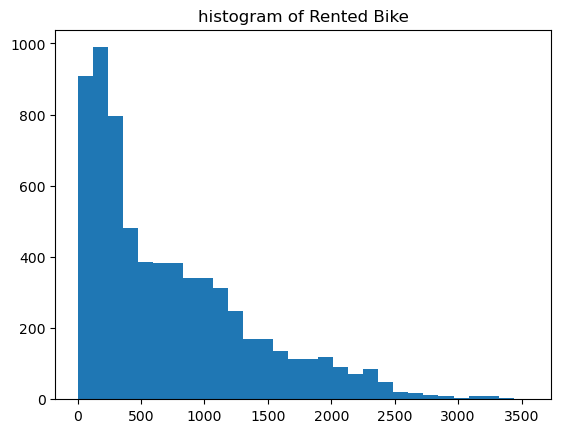

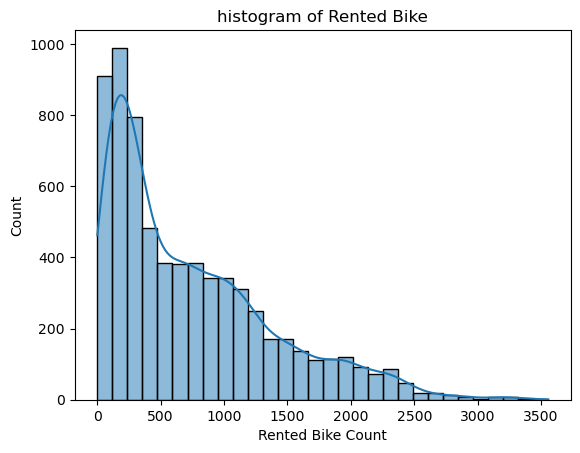

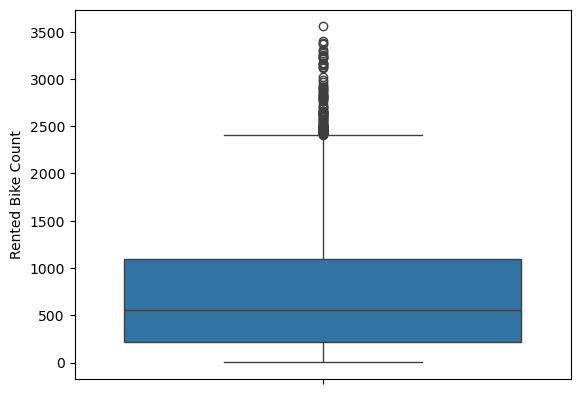

In [13]:
# 분포 확인하기
# 시각화 : 히스토그램
# plt 라이브러리 사용
plt.hist(data3['Rented Bike Count'], bins=30)
plt.title('histogram of Rented Bike', fontsize=12)
plt.show()

#sns 라이브러리 사용
sns.histplot(data3['Rented Bike Count'], bins=30, kde=True)
plt.title('histogram of Rented Bike', fontsize=12)
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Rented Bike Count'])
plt.show()

# 자전거 대여량의 분포는 오른쪽으로 skew 되어 있는 것을 확인할 수 있음
# 박스플롯을 통해 이상치가 존재함을 확인할 수 있음

Hour

In [17]:
data3['Hour'].value_counts().sort_index() #0시부터 23시까지 존재

Hour
0     274
1     285
2     276
3     272
4     286
5     283
6     275
7     269
8     288
9     272
10    282
11    289
12    284
13    284
14    299
15    279
16    290
17    279
18    281
19    287
20    279
21    280
22    282
23    297
Name: count, dtype: int64

Text(0.5, 1.0, 'the number of rented bike by hour')

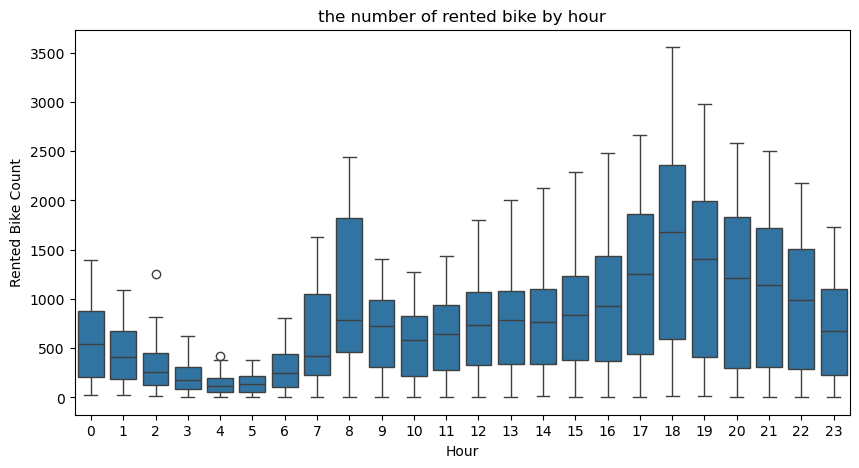

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hour', y='Rented Bike Count', data=data3)
plt.title('the number of rented bike by hour')

# 박스플롯을 통해 중위수가 가장 높은 대여시간대는 18시임을 알 수 있다. 
# 대여량의 최댓값이 있는 시간대 역시 18시이다.

Temperature(기온)


In [20]:
data3['Temperature'] 

0        NaN
1       23.0
2        6.2
3       23.2
4       23.7
        ... 
6767    -9.6
6768    10.6
6769    14.7
6770    20.5
6771    19.3
Name: Temperature, Length: 6772, dtype: float64

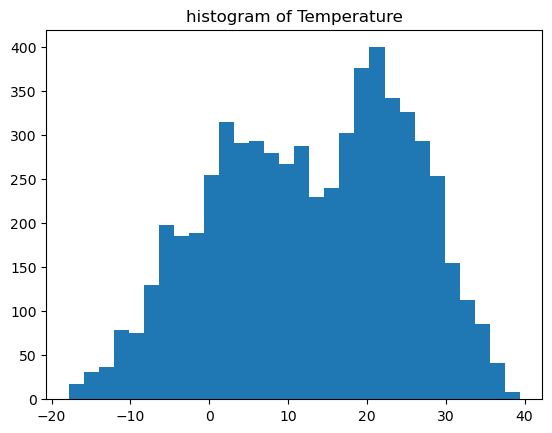

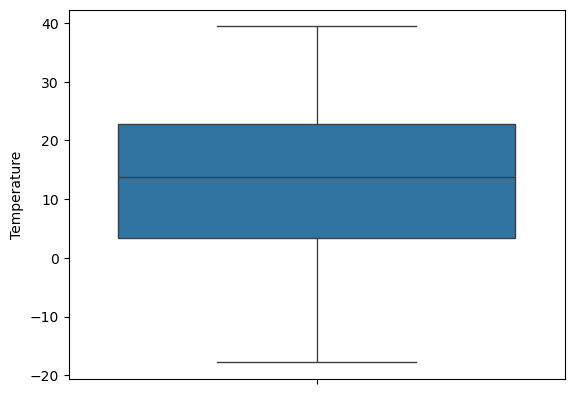

In [21]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Temperature'], bins=30)
plt.title('histogram of Temperature', fontsize=12)
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Temperature'])
plt.show()

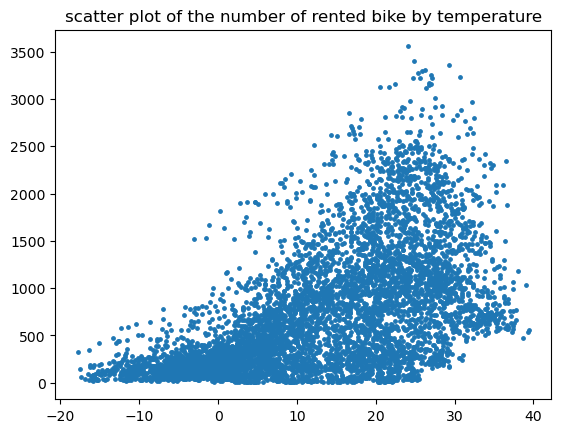

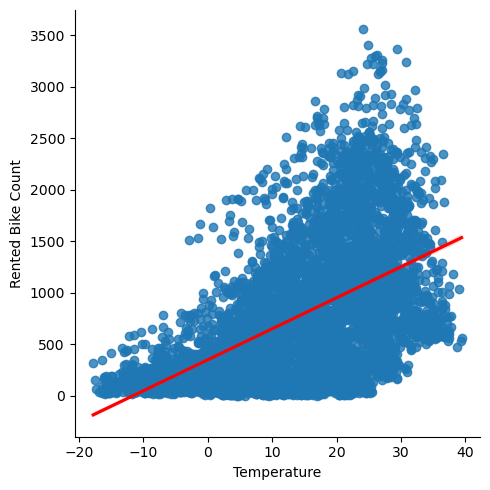

In [22]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3.Temperature, data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by temperature')
sns.lmplot(x='Temperature', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 20도 이상 30도 미만의 경우 대여량의 최댓값이 위치해 있다.

nan
nan


C:\Users\chica\AppData\Local\Temp\ipykernel_3744\1632913599.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_temp_group = data3.groupby('Temp_group')['Rented Bike Count'].mean().reset_index()


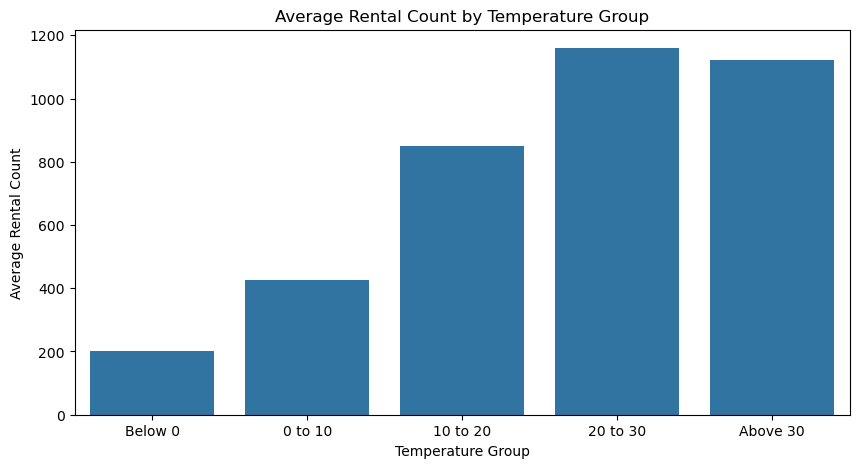

Text(0.5, 1.0, 'The number of bike rental by temperature')

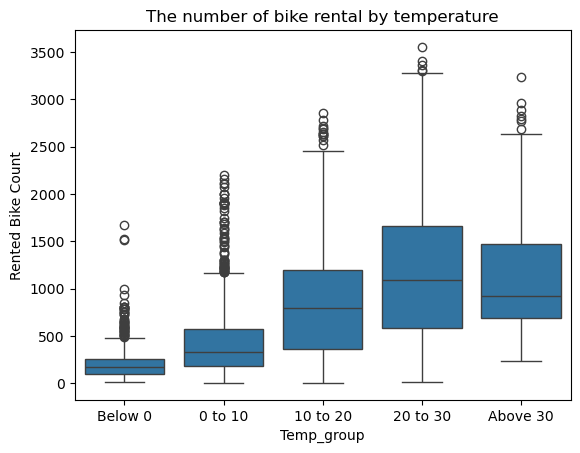

In [23]:
# 기온을 범주화하여 분석해보기
print(min(data3['Temperature']))
print(max(data3['Temperature']))

# -20도 이상 0도 미만, 0도 이상 10도 미만, 10도 이상 20도 미만, 20도 이상 30도 미만, 30도 이상으로 구간을 나누기
bins = [-float('inf'), 0, 10, 20, 30, float('inf')]
labels = ['Below 0', '0 to 10', '10 to 20', '20 to 30', 'Above 30'] # 각 구간의 라벨 설정
data3['Temp_group'] = pd.cut(data3['Temperature'], bins=bins, labels=labels, include_lowest=True)

# 기온그룹별 평균 자전거 대여량 계산
data_temp_group = data3.groupby('Temp_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Temp_group', y='Rented Bike Count', data=data_temp_group)
plt.title('Average Rental Count by Temperature Group')
plt.xlabel('Temperature Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Temp_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by temperature')

# 박스플롯을 통해 대여량의 중위수가 '20 to 30' 그룹까지는 증가하지만, 30도가 넘어가면 약간 감소하는 것을 확인할 수 있음.

Humidity(습도)

In [24]:
data3['Humidity'] #수치형(연속형) 변수

0       42
1       64
2       59
3       83
4       64
        ..
6767    67
6768    77
6769    54
6770    66
6771    76
Name: Humidity, Length: 6772, dtype: int64

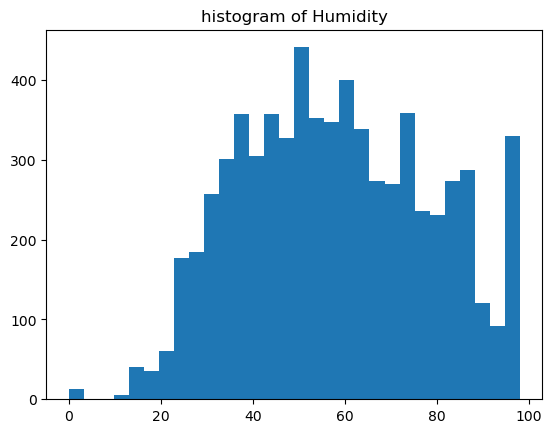

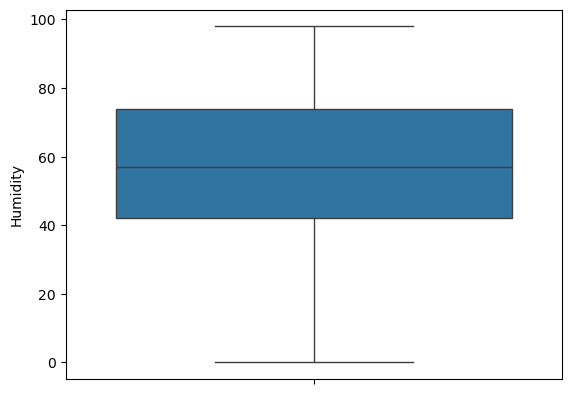

In [25]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Humidity'], bins=30)
plt.title('histogram of Humidity', fontsize=12)
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Humidity'])
plt.show()

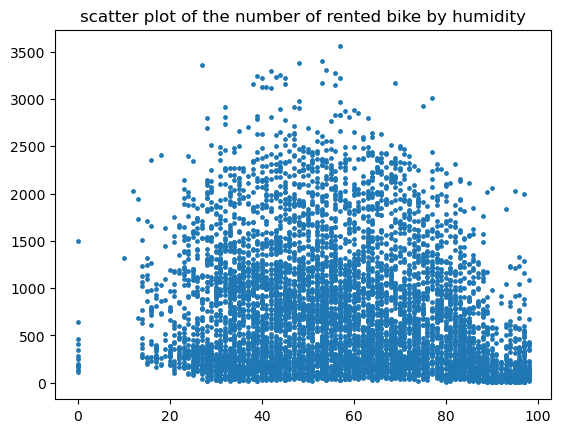

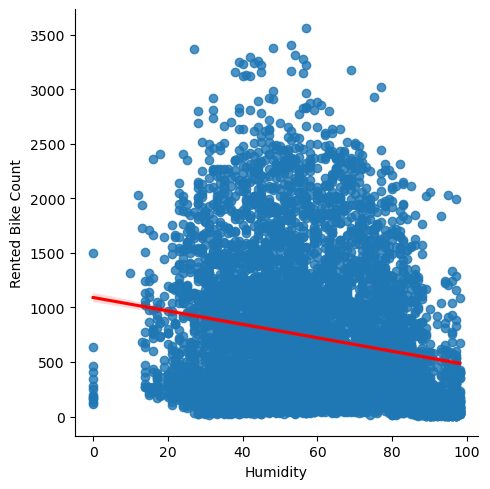

In [26]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3.Humidity, data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by humidity')
sns.lmplot(x='Humidity', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 습도와 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

0
98


C:\Users\chica\AppData\Local\Temp\ipykernel_3744\4075936249.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_humid_group = data3.groupby('Humid_group')['Rented Bike Count'].mean().reset_index()


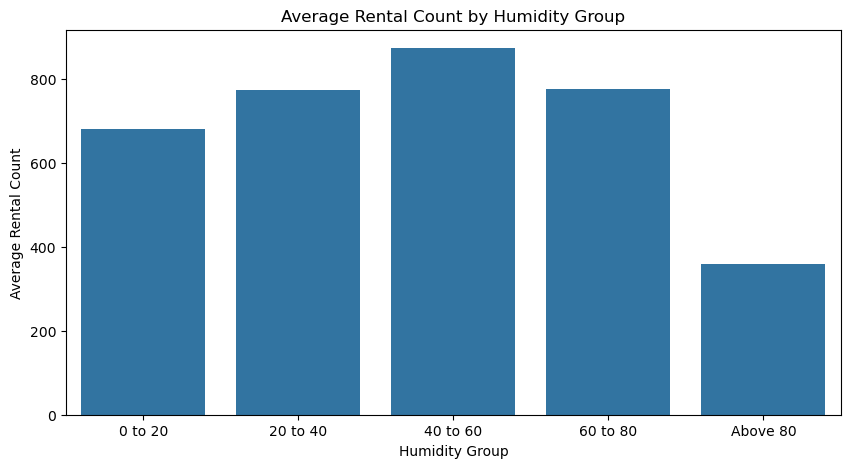

Text(0.5, 1.0, 'The number of bike rental by humidity')

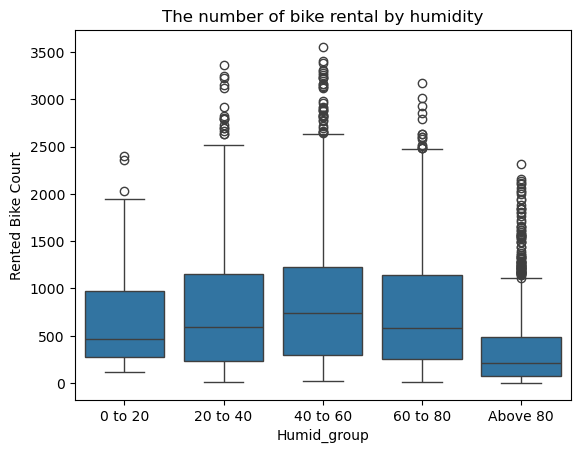

In [27]:
# 습도 범주화하여 분석해보기
print(min(data3['Humidity']))
print(max(data3['Humidity']))

# 0% 이상 20% 미만, 20% 이상 40% 미만, 40% 이상 60% 미만, 60% 이상 80% 미만, 80% 이상으로 구간을 나누기
bins = [-float('inf'), 20, 40, 60, 80, float('inf')]
labels = ['0 to 20', '20 to 40', '40 to 60', '60 to 80', 'Above 80'] # 각 구간의 라벨 설정
data3['Humid_group'] = pd.cut(data3['Humidity'], bins=bins, labels=labels, include_lowest=True)

# 습도그룹별 평균 자전거 대여량 계산
data_humid_group = data3.groupby('Humid_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Humid_group', y='Rented Bike Count', data=data_humid_group)
plt.title('Average Rental Count by Humidity Group')
plt.xlabel('Humidity Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Humid_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by humidity')

# 박스플롯을 통해 0%~80% 까지는 대여량의 중위수에 큰 차이가 나지 않는다. 그러나 80%가 넘어가면 중위수가 감소한 것을 확인할 수 있다.

## Wind speed(풍속)

* 자전거 대여량에 영향을 크게 미치지 않는다.
* 대여량 변수와의 상관계수 : 0.13
* 범주화하여 분석한 결과 풍속이 1.5이상 3미만인 경우 평균 대여량이 가장 높게 나타났다.

In [28]:
data3['Wind speed'] #수치형(연속형) 변수

0       1.3
1       2.8
2       0.6
3       1.6
4       0.9
       ... 
6767    1.0
6768    0.9
6769    1.3
6770    1.7
6771    2.1
Name: Wind speed, Length: 6772, dtype: float64

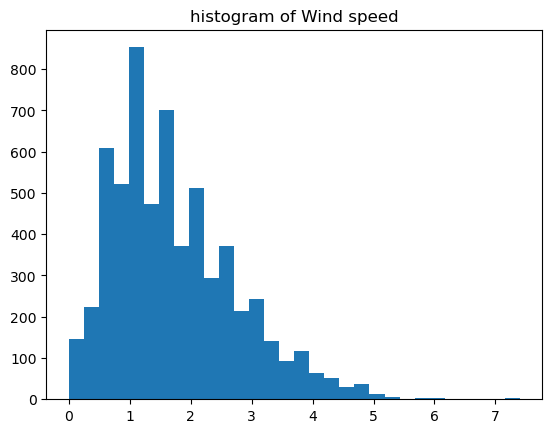

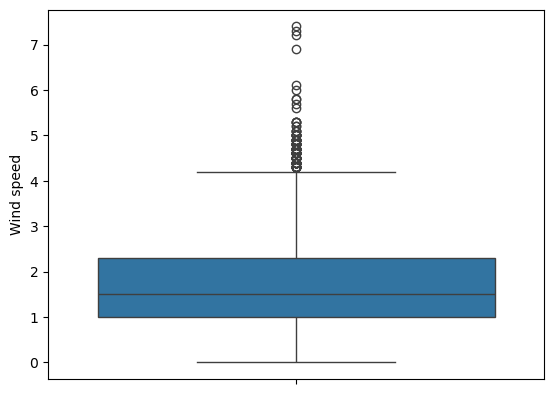

In [29]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Wind speed'], bins=30)
plt.title('histogram of Wind speed', fontsize=12) #오른쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Wind speed'])
plt.show() #이상치 존재

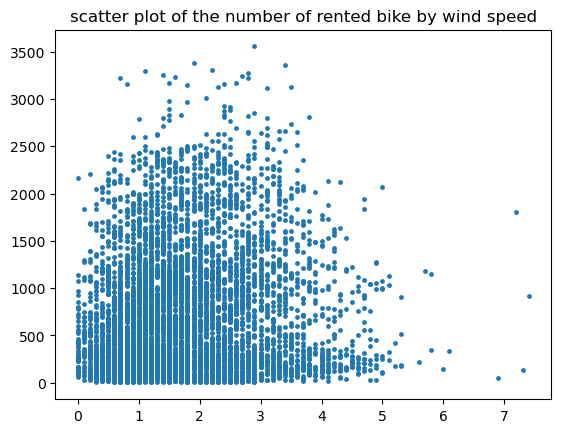

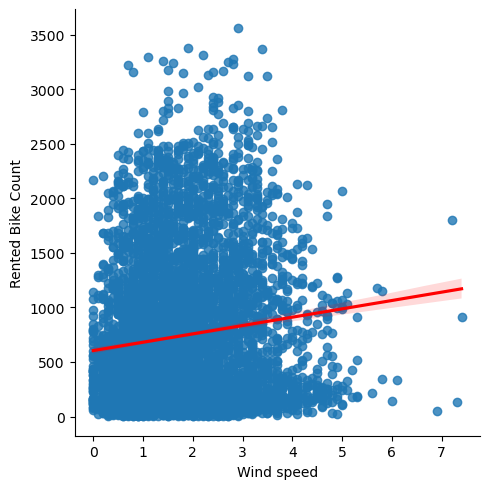

In [30]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Wind speed'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by wind speed')
sns.lmplot(x='Wind speed', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 풍속과 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

## Visibility(가시성)

In [32]:
data3.Visibility #수치형(연속형) 변수

0       1976
1        520
2       1584
3       1102
4        876
        ... 
6767    1503
6768     422
6769     718
6770    1062
6771    2000
Name: Visibility, Length: 6772, dtype: int64

In [33]:
data3.Visibility.value_counts() #2000이 많은 것 같아서 빈도분석해봄 #2000이 전체 데이터의 약 25%을 차지함.

Visibility
2000    1755
1995      25
1999      22
1985      21
1996      21
        ... 
1148       1
618        1
89         1
594        1
188        1
Name: count, Length: 1688, dtype: int64

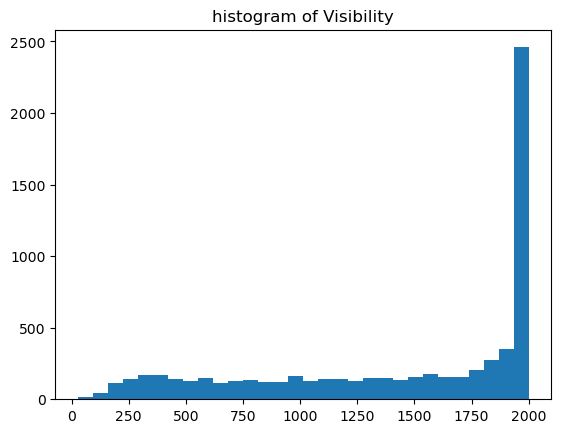

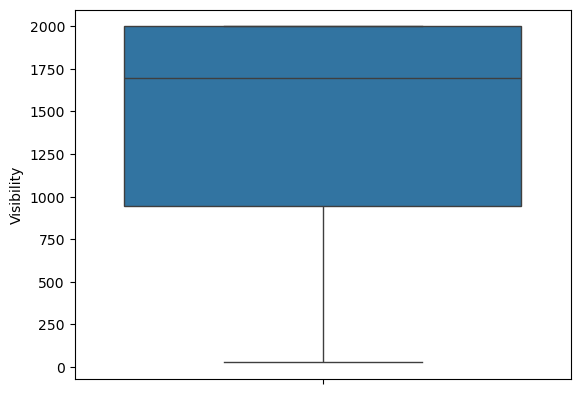

In [34]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Visibility'], bins=30)
plt.title('histogram of Visibility', fontsize=12) #왼쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Visibility'])
plt.show()

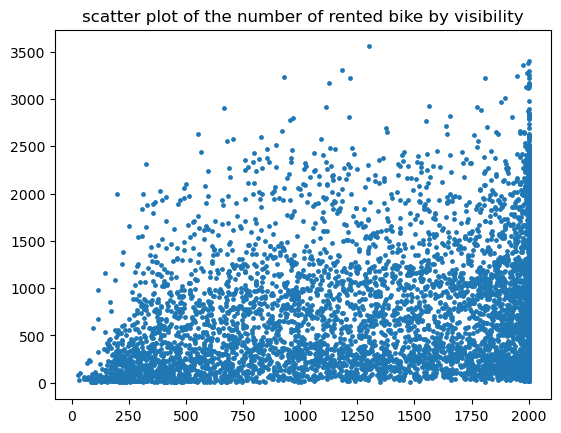

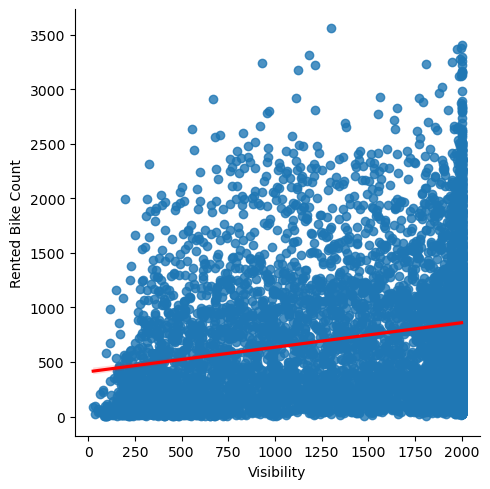

In [35]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Visibility'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by visibility')
sns.lmplot(x='Visibility', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 가시성과 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

27
2000


C:\Users\chica\AppData\Local\Temp\ipykernel_3744\4245422973.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_vis_group = data3.groupby('Vis_group')['Rented Bike Count'].mean().reset_index()


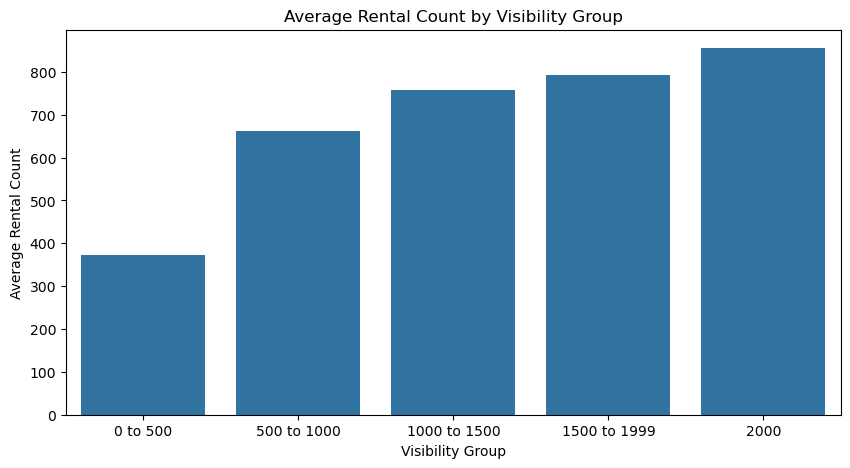

Text(0.5, 1.0, 'The number of bike rental by visibility')

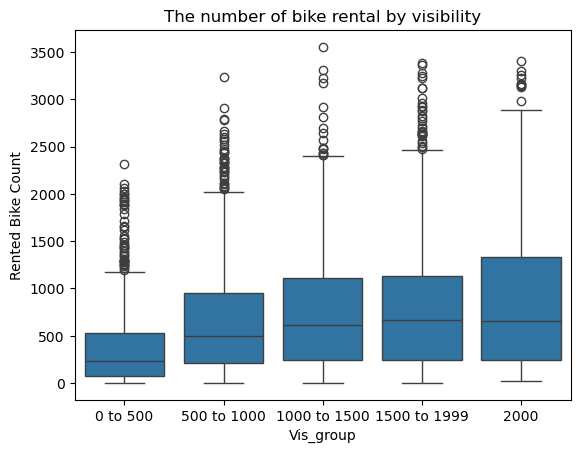

In [36]:
# 가시성을 범주화하여 분석해보기
print(min(data3['Visibility'])) 
print(max(data3['Visibility'])) 

# 0 이상 500 미만, 500 이상 1000 미만, 1000 이상 1500 미만, 1500 이상 2000 미만, 2000으로 구간을 나누기
bins = [-float('inf'), 500, 1000, 1500, 1999, float('inf')]
labels = ['0 to 500', '500 to 1000', '1000 to 1500', '1500 to 1999', '2000'] # 각 구간의 라벨 설정
data3['Vis_group'] = pd.cut(data3['Visibility'], bins=bins, labels=labels, include_lowest=True)

# 가시성그룹별 평균 자전거 대여량 계산
data_vis_group = data3.groupby('Vis_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Vis_group', y='Rented Bike Count', data=data_vis_group)
plt.title('Average Rental Count by Visibility Group')
plt.xlabel('Visibility Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Vis_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by visibility')

# 가시성이 2000이었을 때 평균 대여량이 가장 높음
# '0 to 500' 그룹을 제외하고는 가시성에 따른 대여량의 중위수가 모두 비슷하게 나타남

## Dew point temperature(이슬점 온도)

* 자전거 대여량과의 약한 양의 상관관계
* 대여량 변수와의 상관계수 : 0.4
* 범주화 분석 결과, 0도 이상일 때 평균 대여량이 높게 나타났다.

In [37]:
data3['Dew point temperature'] #수치형(연속형) 변수

0        5.0
1       15.8
2       -1.2
3       20.1
4       16.4
        ... 
6767   -14.5
6768     6.7
6769     5.4
6770    13.9
6771    14.9
Name: Dew point temperature, Length: 6772, dtype: float64

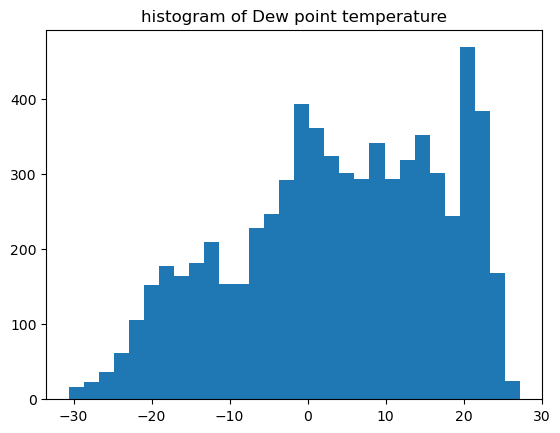

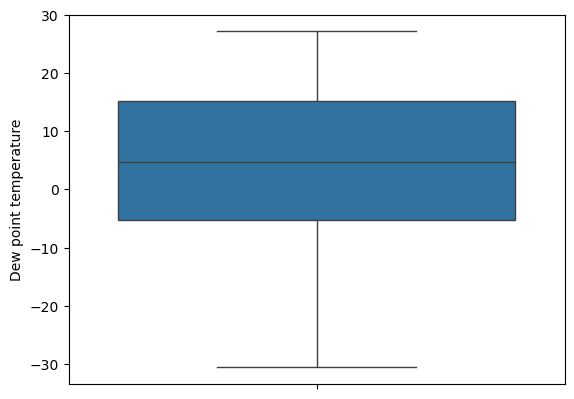

In [38]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Dew point temperature'], bins=30)
plt.title('histogram of Dew point temperature', fontsize=12)
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Dew point temperature'])
plt.show()

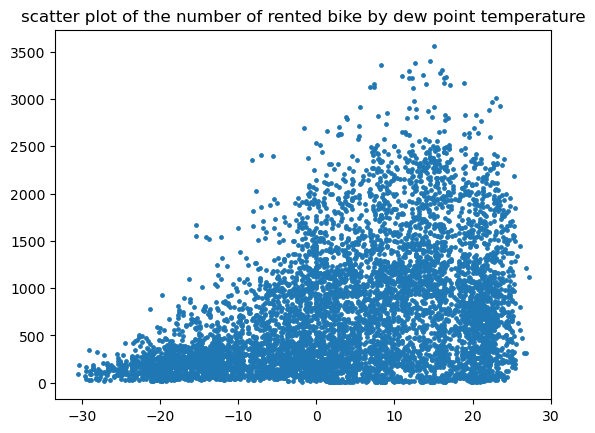

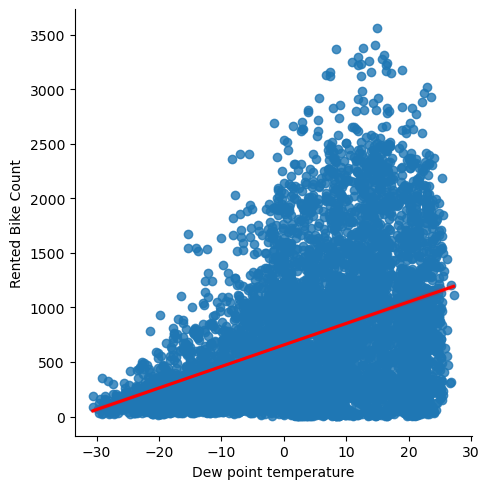

In [39]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Dew point temperature'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by dew point temperature')
sns.lmplot(x='Dew point temperature', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 이슬점 온도가 높아졌을 때 대여량이 증가하는 경우가 종종 나타난다. #약한 양의 상관관계를 보인다

-30.6
27.2


C:\Users\chica\AppData\Local\Temp\ipykernel_3744\2858004688.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_dew_group = data3.groupby('Dew_group')['Rented Bike Count'].mean().reset_index()


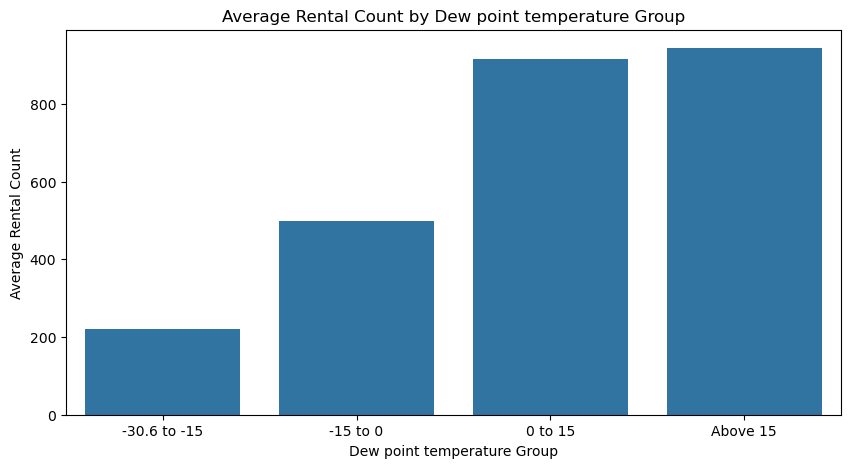

Text(0.5, 1.0, 'The number of bike rental by Dew point temperature')

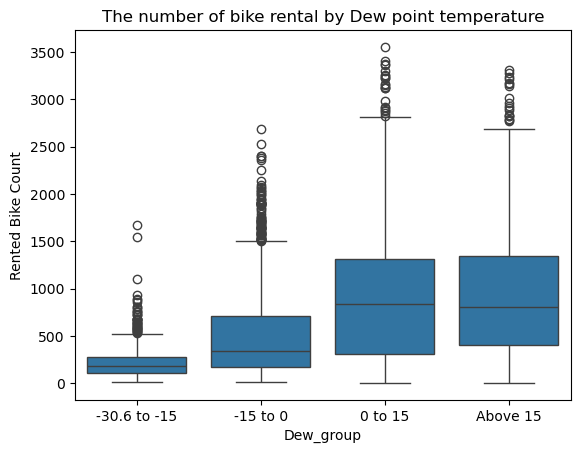

In [40]:
# 이슬점 온도를 범주화해서 분석해보기
print(min(data3['Dew point temperature'])) 
print(max(data3['Dew point temperature'])) 

# -30.6도 이상 -15도 미만, -15도 이상 0도 미만, 0도 이상 15도 미만, 15도 이상으로 구간을 나누기
bins = [-float('inf'),-15, 0, 15, float('inf')]
labels = ['-30.6 to -15', '-15 to 0', '0 to 15', 'Above 15'] # 각 구간의 라벨 설정
data3['Dew_group'] = pd.cut(data3['Dew point temperature'], bins=bins, labels=labels, include_lowest=True)

# 이슬점 온도 그룹별 평균 자전거 대여량 계산
data_dew_group = data3.groupby('Dew_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Dew_group', y='Rented Bike Count', data=data_dew_group)
plt.title('Average Rental Count by Dew point temperature Group')
plt.xlabel('Dew point temperature Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Dew_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by Dew point temperature')

## Solar Radiation(태양 복사열)

* 범주화 분석 결과, 태양 복사열이 3.0이상일 때 평균 대여량이 가장 높게 나타났다.
* 태양 복사열이 높아질수록 대여량의 중위수는 증가하는 추세를 보인다.

In [41]:
data3['Solar Radiation']

0       1.22
1       1.59
2       0.00
3       0.00
4       0.00
        ... 
6767    0.00
6768    0.00
6769    0.00
6770    0.34
6771    0.21
Name: Solar Radiation, Length: 6772, dtype: float64

In [42]:
data3['Solar Radiation'].value_counts() #0이 많은 것 같아 빈도분석 해봄.

Solar Radiation
0.00    3310
0.01      99
0.02      60
0.06      50
0.03      49
        ... 
3.42       1
3.32       1
3.45       1
3.04       1
3.52       1
Name: count, Length: 343, dtype: int64

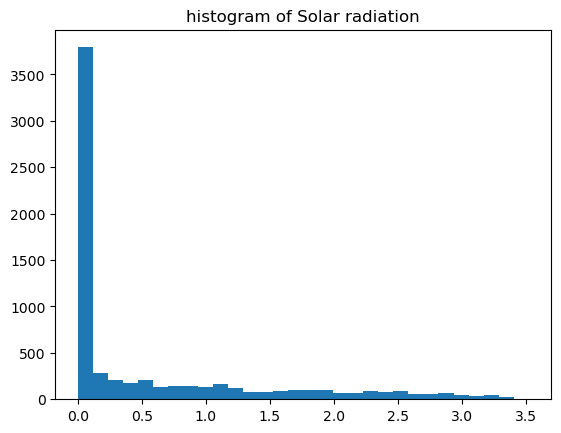

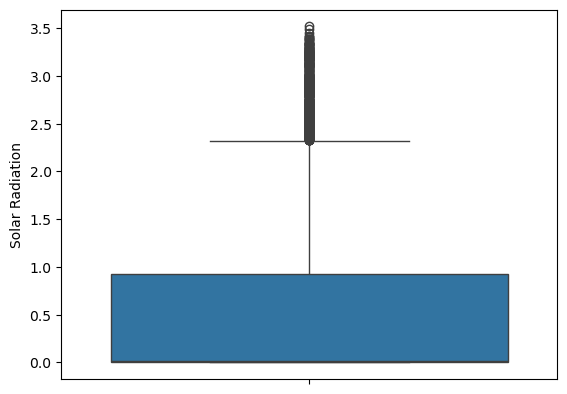

In [43]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Solar Radiation'], bins=30)
plt.title('histogram of Solar radiation', fontsize=12) #오른쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Solar Radiation'])
plt.show() # 0근처의 값이 데이터의 절반 이상을 차지하므로 이상치가 매우 많은 것으로 나타남.

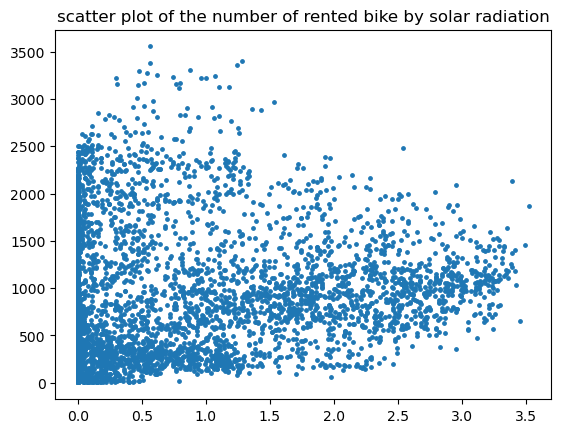

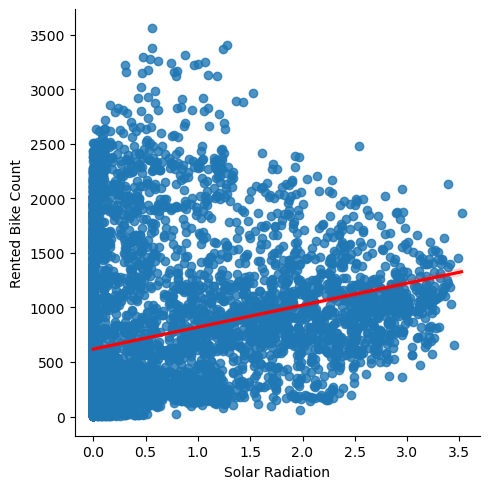

In [44]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Solar Radiation'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by solar radiation')
sns.lmplot(x='Solar Radiation', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 태양 복사열과 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

0.0
3.52


C:\Users\chica\AppData\Local\Temp\ipykernel_3744\4074802918.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_sol_group = data3.groupby('Sol_group')['Rented Bike Count'].mean().reset_index()


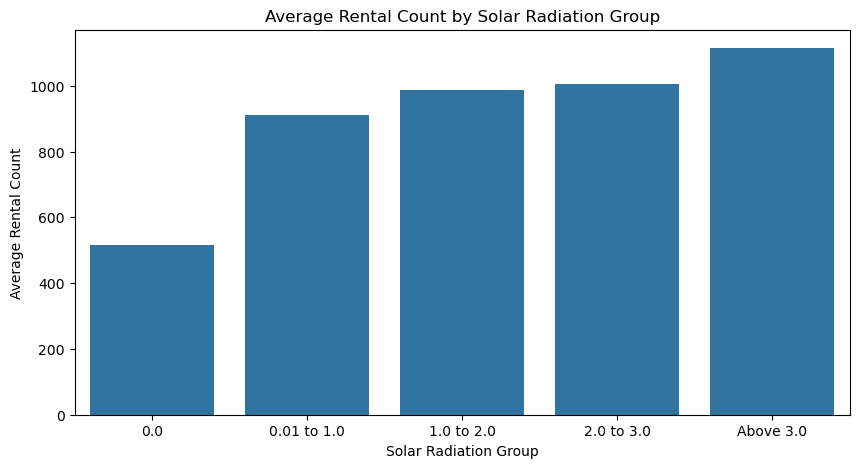

Text(0.5, 1.0, 'The number of bike rental by Solar Radiation')

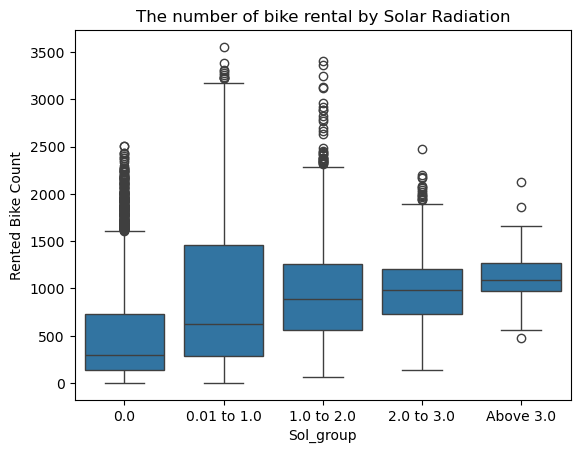

In [45]:
# 태양 복사열을 범주화해서 분석해보기
print(min(data3['Solar Radiation'])) 
print(max(data3['Solar Radiation'])) 

# 0.0,0.01 이상 1.0 미만, 1.0 이상 2.0 미만, 2.0 이상 3.0 미만 3.0 이상으로 구간을 나누기
bins = [0.0, 0.01, 1.0, 2.0, 3.0, float('inf')]
labels = ['0.0', '0.01 to 1.0', '1.0 to 2.0', '2.0 to 3.0', 'Above 3.0'] # 각 구간의 라벨 설정
data3['Sol_group'] = pd.cut(data3['Solar Radiation'], bins=bins, labels=labels, include_lowest=True)

# 이슬점 온도 그룹별 평균 자전거 대여량 계산
data_sol_group = data3.groupby('Sol_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Sol_group', y='Rented Bike Count', data=data_sol_group)
plt.title('Average Rental Count by Solar Radiation Group')
plt.xlabel('Solar Radiation Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Sol_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by Solar Radiation')

# 태양 복사열이 높아질수록 대여량의 중위수는 증가하는 추세를 보인다.

## Rainfall(강수량)

* 대부분이 0의 값을 가짐.
* 자전거 대여량과 뚜렷한 선형관계가 나타나지 않음.

In [46]:
data3['Rainfall']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.1
       ... 
6767    0.0
6768    0.0
6769    0.0
6770    0.0
6771    0.0
Name: Rainfall, Length: 6772, dtype: float64

In [47]:
data3['Rainfall'].value_counts() # 강수량이 0인 경우가 7949로 전체 데이터의 대부분이 포함됨.

Rainfall
0.0     6362
0.5       93
1.0       48
1.5       44
0.1       32
2.0       26
2.5       18
0.2       16
3.5       15
4.0       12
0.4       12
3.0       11
6.0        6
0.3        6
9.5        5
5.0        5
5.5        5
4.5        5
6.5        4
7.0        3
0.8        3
8.0        3
18.5       2
6.4        2
13.5       2
1.6        2
13.0       2
3.7        1
29.5       1
1.9        1
9.1        1
0.7        1
7.5        1
1.8        1
1.1        1
21.5       1
12.5       1
19.0       1
16.0       1
10.0       1
5.4        1
4.9        1
1.4        1
10.5       1
1.3        1
12.0       1
7.3        1
14.5       1
0.9        1
17.0       1
18.0       1
1.2        1
3.3        1
9.0        1
35.0       1
Name: count, dtype: int64

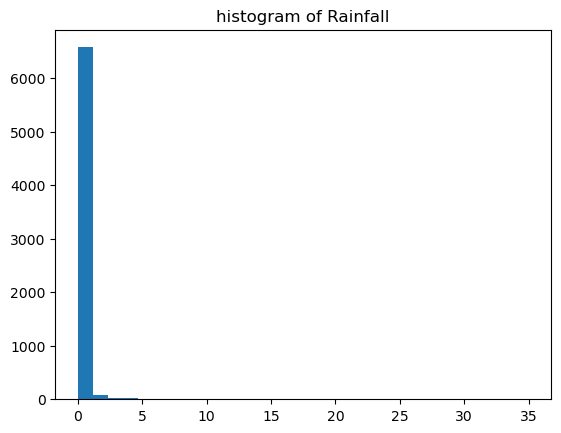

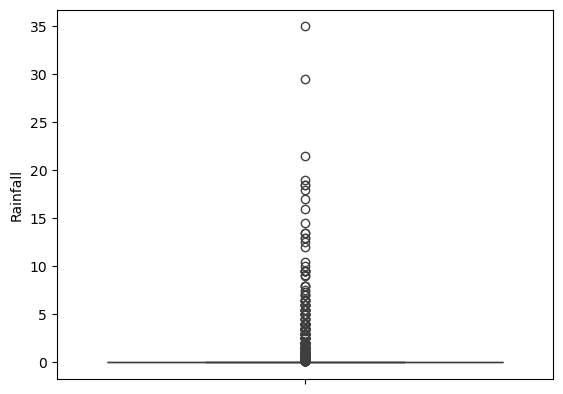

In [48]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Rainfall'], bins=30)
plt.title('histogram of Rainfall', fontsize=12) #오른쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Rainfall'])
plt.show() #전체 데이터 대부분이 강수량이 0이므로, 0 이외의 값은 이상치로 처리됨

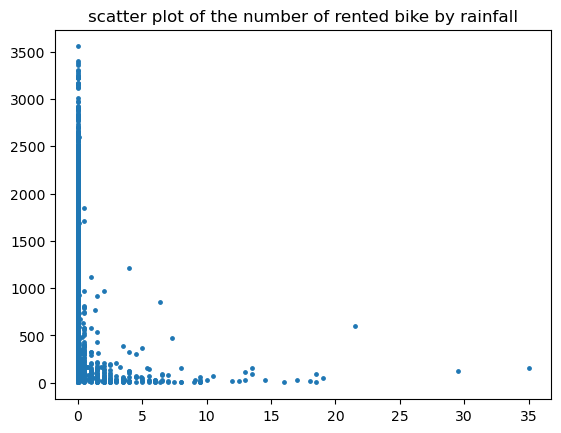

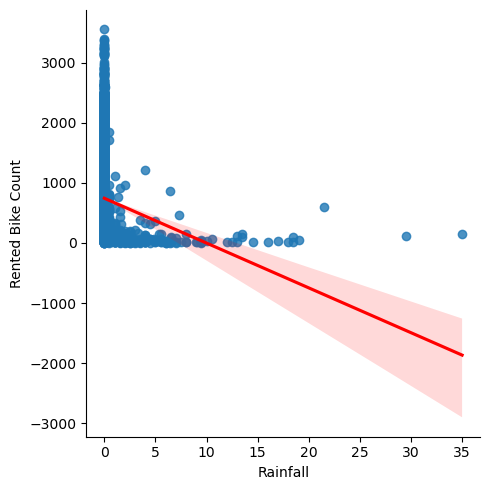

In [49]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Rainfall'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by rainfall')
sns.lmplot(x='Rainfall', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 강수량이 적은 날에 대여량의 최댓값이 위치해 있다.
# 강수량과 대여량 간에 뚜렷한 선형관계가 나타나지 않는다. 
# 선형관계로 파악하기보다 loess를 사용해보면 어떨까?
# 이차함수 곡선 형태로 비가 오면 급격히 대여량이 감소하므로 비가 오면 사람들이 자전거를 타지 않는다고 해석할 수 있다.

## Snowfall(적설량)

* 대부분이 0의 값을 가짐.
* 자전거 대여량과 뚜렷한 선형관계가 나타나지 않음.

In [50]:
data3['Snowfall']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6767    0.0
6768    0.0
6769    0.0
6770    0.0
6771    0.0
Name: Snowfall, Length: 6772, dtype: float64

In [51]:
data3['Snowfall'].value_counts() #적설량이 0인 경우가 전체 데이터의 대부분을 차지함.

Snowfall
0.0    6416
0.3      34
1.0      31
0.7      28
0.5      28
0.9      28
2.0      20
0.8      17
1.6      15
0.4      15
2.2      14
0.6      13
0.2      12
3.5      11
2.6       8
2.5       8
2.7       6
1.2       6
3.0       4
3.2       4
3.3       3
2.3       3
4.1       3
1.7       3
1.1       3
8.8       2
0.1       2
2.4       2
1.8       2
2.8       2
5.0       2
4.8       2
2.1       2
2.9       2
3.9       2
4.3       2
1.4       2
3.4       2
3.7       2
3.8       2
7.0       1
4.0       1
4.2       1
7.1       1
3.6       1
5.1       1
1.9       1
1.5       1
1.3       1
Name: count, dtype: int64

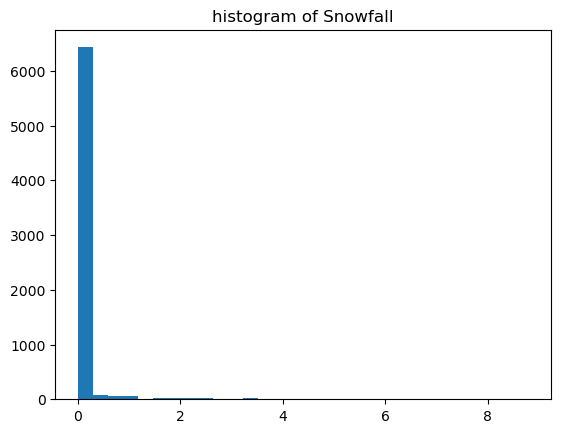

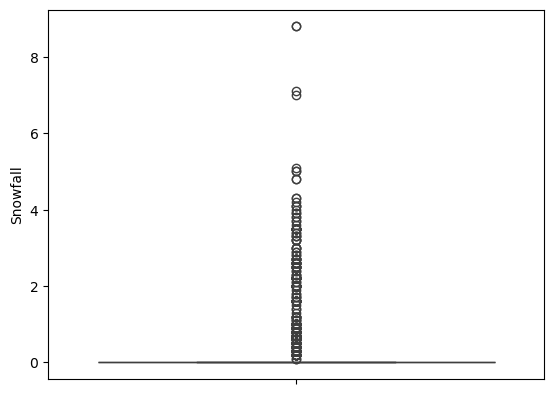

In [52]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Snowfall'], bins=30)
plt.title('histogram of Snowfall', fontsize=12) #오른쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Snowfall'])
plt.show() #전체 데이터 대부분이 강수량이 0이므로, 0 이외의 값은 이상치로 처리됨

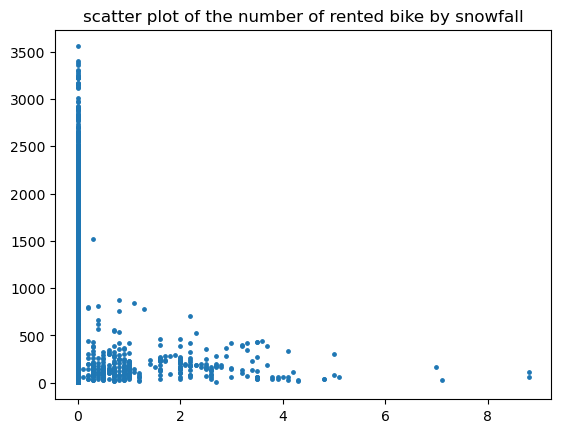

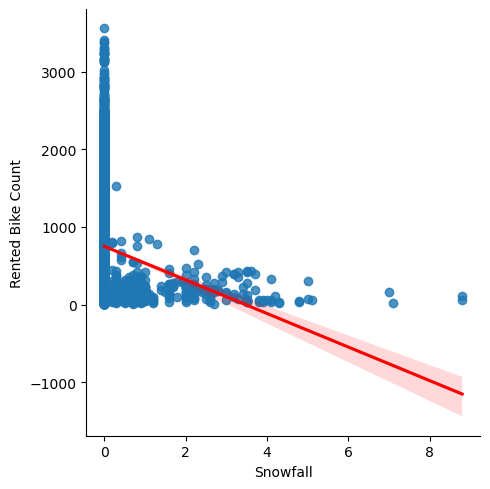

In [53]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Snowfall'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by snowfall')
sns.lmplot(x='Snowfall', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 적설량이 적은 날에 대여량의 최댓값이 위치해 있다.
# 적설량과 대여량 간에 뚜렷한 선형관계가 나타나지 않는다.
# 선형관계로 파악하기보다 loess를 사용해보면 어떨까?
# 이차함수 곡선 형태로 비가 오면 급격히 대여량이 감소하므로 눈이 오면 사람들이 자전거를 타지 않는다고 해석할 수 있다.

## Seasons(계절)

* 여름, 봄, 겨울, 가을 순으로 데이터의 개수가 많지만 큰 차이는 없음(계절별 데이터 분포가 거의 동일함)
* 여름에 평균 자전거 대여량이 가장 높게 나타남

In [54]:
data3.Seasons #범주형 변수

0          NaN
1       Spring
2       Autumn
3       Summer
4       Summer
         ...  
6767    Winter
6768    Spring
6769    Spring
6770    Spring
6771       NaN
Name: Seasons, Length: 6772, dtype: object

In [55]:
data3.Seasons.value_counts()

Seasons
Summer    1598
Winter    1570
Spring    1516
Autumn    1414
Name: count, dtype: int64

<Axes: xlabel='Seasons', ylabel='count'>

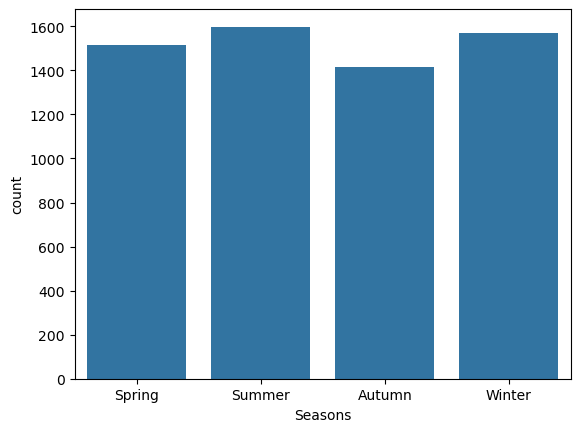

In [56]:
# 분포 확인하기
# 시각화 : 막대그래프
sns.countplot(x='Seasons', data=data3, order=['Spring','Summer','Autumn','Winter'])

## Holiday

Holiday
No Holiday    6462
Holiday        310
Name: count, dtype: int64


<Axes: xlabel='Holiday', ylabel='count'>

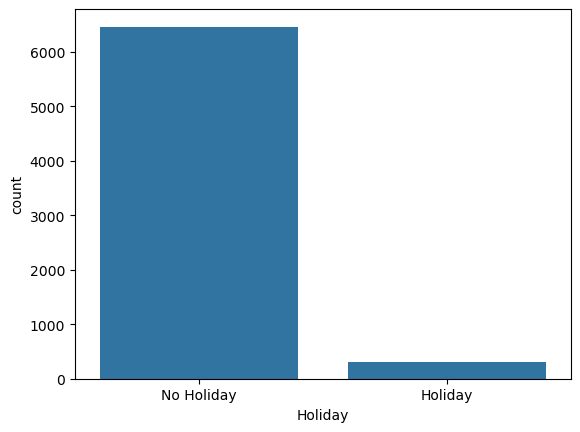

In [60]:
# 분포 확인하기
print(data3.Holiday.value_counts())

# 시각화
sns.countplot(x='Holiday', data=data3)